In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testfile.csv to testfile.csv


In [ ]:
#importing required packages
import io
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# uploading dataset
df2 = df2 = pd.read_csv(io.BytesIO(uploaded['testfile.csv']))
df2

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136,160296.36,M1979787155,0,0,0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249,19384.72,M2044282225,0,0,0,0
2,2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,4,1,PAYMENT,11668.14,C2048537720,41554,29885.86,M1230701703,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0,C776919290,0,339682.13,1,0
57,6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0,C1881841831,0,0,1,0
58,6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0,C1365125890,68488.84,6379898.11,1,0
59,6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0,C2080388513,0,0,1,0


28
33
Percentage frauds: 1.1785714285714286


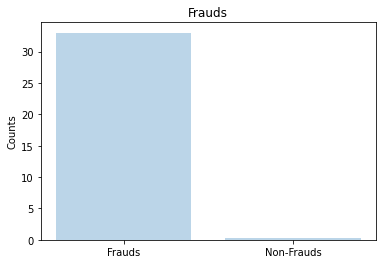

In [ ]:
#plotting the number of frauds and non frauds
%matplotlib inline
import matplotlib.pyplot as plt
frauds = list(df2['isFraud'])
frauds

# print(frauds)
count_0 = 0
count_1 = 0
for i in frauds:
  if (i=='0'):
    count_0 += 1
  else:
    count_1 += 1
print(count_0)
print(count_1)
print('Percentage frauds:',count_1/count_0)

objects = ('Frauds', 'Non-Frauds')
y_pos = np.arange(len(objects))

#The number of frauds are too less to be depicted in the plot, so the count of non-frauds has been divided by 100 for better clarity 
performance = [count_1,count_0/100]
plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Frauds')
plt.show()

Types of transactions that have Frauds:  []


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
15,15,1,CASH_OUT,229133.94,C905080434,15325,0,C476402209,5083,51513.44,0,0
19,19,1,TRANSFER,215310.3,C1670993182,705,0,C1100439041,22425,0,0,0
24,24,1,TRANSFER,311685.89,C1984094095,10835,0,C932583850,6267,2719172.89,0,0
31,6362590,741,TRANSFER,323726.61,C509686434,323726.61,0,C1310143791,0,0,1,0
32,6362591,741,CASH_OUT,323726.61,C919525792,323726.61,0,C993635374,561753.58,885480.19,1,0
33,6362592,741,TRANSFER,383661.1,C457476945,383661.1,0,C1688658215,0,0,1,0
34,6362593,741,CASH_OUT,383661.1,C369315575,383661.1,0,C2069429837,1788112.7,2171773.8,1,0
35,6362594,741,TRANSFER,144945.34,C31496887,144945.34,0,C1251365829,0,0,1,0


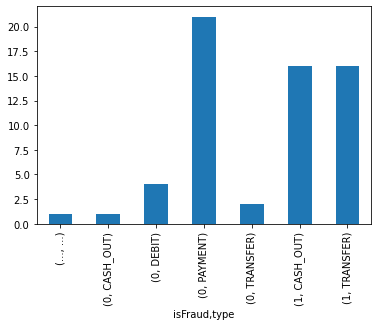

In [ ]:
# the below data and plot shows the distribution of the fraud transactions in the type of data

# types of fraud transactions
fraud_trans = list(df2.loc[df2.isFraud==1].type.drop_duplicates().values)
print('Types of transactions that have Frauds: ',fraud_trans)

# plot for the same
fraud_count = df2.groupby(['isFraud','type']).size().plot(kind='bar')

# removing the data which do not have fraudalant transactions
trans_data_new = df2.loc[(df2['type'].isin(['TRANSFER','CASH_OUT'])),:] 
trans_data_new

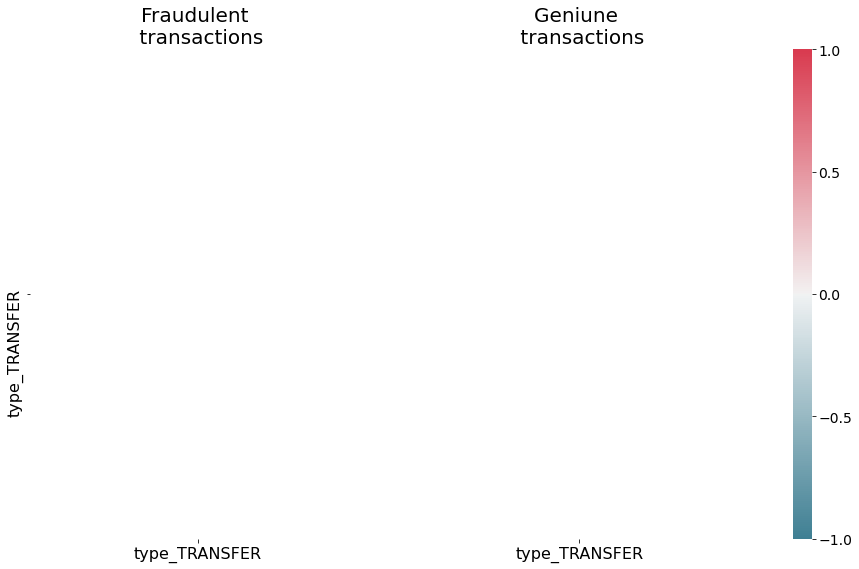

In [ ]:
#Plotting the correlation between the features for fraud and genuine transactions
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

import seaborn as sns
Xfraud = X.loc[y['isFraud']==1] # update Xfraud & XnonFraud with cleaned data
Xnonfraud = X.loc[y['isFraud']==0]
                  
correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationFraud)
indices = np.triu_indices_from(correlationFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Fraudulent \n transactions', size = 20)

correlationnonFraud = Xnonfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationnonFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Geniune \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

In [ ]:
# Snippet to create the train and test splits 
X = trans_data_new.drop(columns=['isFraud'])

# removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Classification using Logistic regression
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])
y.shape

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#without applying SMOTE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_ac = accuracy_score(y_test, y_pred)*100
lr_rs = recall_score(y_test, y_pred)*100
lr_ps = precision_score(y_test, y_pred)*100
lr_fs = f1_score(y_test, y_pred)*100

print('Logistic Regression ')
print('Accuracy:',lr_ac,'%')
print('Recall:',lr_rs,'%')
print('Precision:',lr_ps,'%')
print('F1 score:',lr_fs,'%')



Logistic Regression 
Accuracy: 100.0 %
Recall: 100.0 %
Precision: 100.0 %
F1 score: 100.0 %


In [ ]:
# Classification using Random Forest method
# this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# from sklearn.ensemble import RandomForestRegressor
# # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# # Train the model on training data
# rf.fit(X_train,y_train);
# y_pred = rf.predict(X_test)

#without applying SMOTE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_ac = accuracy_score(y_test, y_pred)*100
rf_rs = recall_score(y_test, y_pred)*100
rf_ps = precision_score(y_test, y_pred)*100
rf_fs = f1_score(y_test, y_pred)*100

print('Random Forest Method:')
print('Accuracy:',rf_ac,'%')
print('Recall:',rf_rs,'%')
print('Precision:',rf_ps,'%')
print('F1 score:',rf_fs,'%')


Random Forest Method:
Accuracy: 100.0 %
Recall: 100.0 %
Precision: 100.0 %
F1 score: 100.0 %


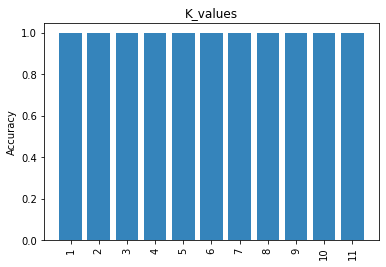

In [ ]:
# Classification using KNN classifier
# this is to get the independent varaibles
from sklearn.model_selection import cross_val_score

X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,12)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train, y_train, cv=10, scoring = 'accuracy')
    k_score.append(score.mean())

# PLot for getting the best k-value for KNN
#print(k_score)
%matplotlib inline
import matplotlib.pyplot as plt
algos = range(1,16)
precisions = np.arange(11)
performance = [0.9986073503739492, 0.998994167616751, 0.9989015038762489, 0.9989844701826799, 0.9989359833519117, 0.9989639979373166, 0.9989402932294092, 0.9989392157593091, 0.9989182048166274, 0.9989289796830663, 0.9989171273378201] 
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Accuracy')
plt.title('K_values') 
plt.show()

In [ ]:
# Application of algorithm using the best k-value
from sklearn.neighbors import KNeighborsClassifier
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)

#without applying SMOTE
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

knn_ac = accuracy_score(y_test, y_pred)*100
knn_rs = recall_score(y_test, y_pred)*100
knn_ps = precision_score(y_test, y_pred)*100
knn_fs = f1_score(y_test, y_pred)*100

print('KNN Method without applying SMOTE-')
print('Accuracy:',knn_ac,'%')
print('Recall:',knn_rs,'%')
print('Precision:',knn_ps,'%')
print('F1 score:',knn_fs,'%')

KNN Method without applying SMOTE-
Accuracy: 100.0 %
Recall: 100.0 %
Precision: 100.0 %
F1 score: 100.0 %


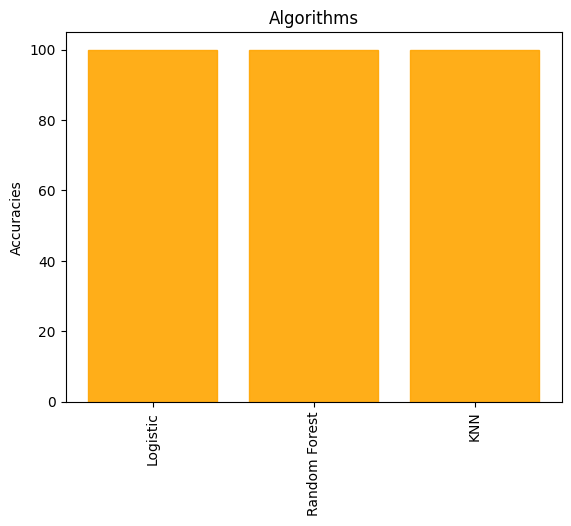

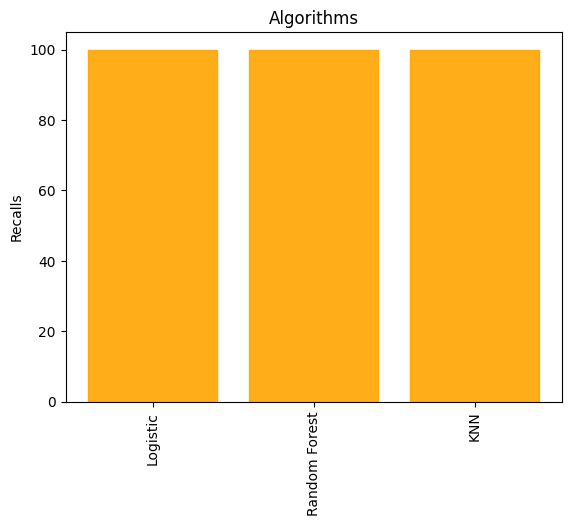

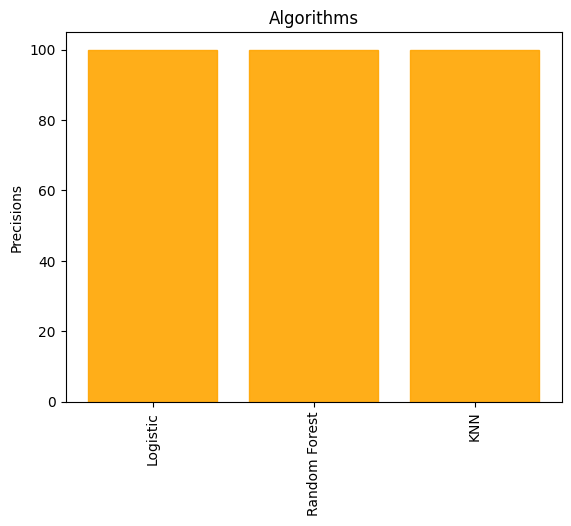

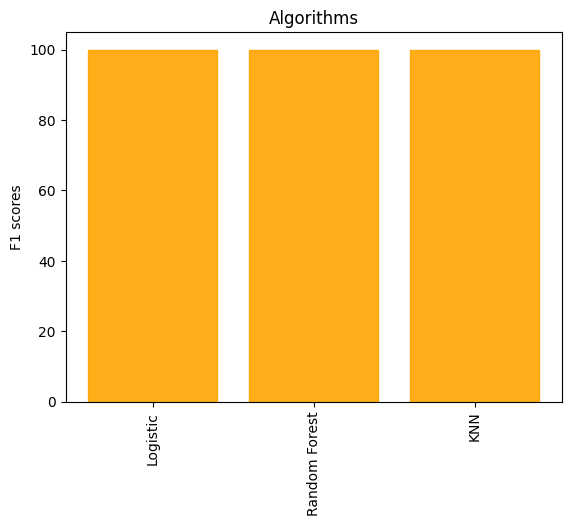

In [ ]:
# PLotting all required metrics to compare the algorithms
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 
#plotting accuracies    
algos = ('Logistic','Random Forest','KNN')
accuracies = np.arange(len(algos))
performance = [lr_ac,rf_ac,knn_ac] 
bars = plt.bar(accuracies, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(accuracies, algos,rotation='vertical')
plt.ylabel('Accuracies')
plt.title('Algorithms') 
plt.show()

#plotting recall scores    
algos = ('Logistic','Random Forest','KNN')
recalls = np.arange(len(algos))
performance = [lr_rs,rf_rs,knn_rs] 
bars = plt.bar(recalls, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(recalls, algos,rotation='vertical')
plt.ylabel('Recalls')
plt.title('Algorithms') 
plt.show()

#plotting precisions    
algos = ('Logistic','Random Forest','KNN')
precisions = np.arange(len(algos))
performance = [lr_ps,rf_ps,knn_ps] 
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Precisions')
plt.title('Algorithms') 
plt.show()

#plotting F1 scores    
algos = ('Logistic','Random Forest','KNN')
fscores = np.arange(len(algos))
performance = [lr_fs,rf_fs,knn_fs] 
bars = plt.bar(fscores, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(fscores, algos,rotation='vertical')
plt.ylabel('F1 scores')
plt.title('Algorithms') 
plt.show()